In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

D:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [33]:

atp_matches_2024 = pd.read_csv('Downloads/atp_matches_2024.csv')
atp_matches_2023 = pd.read_csv('Downloads/atp_matches_2023.csv')
atp_matches_2022 = pd.read_csv('Downloads/atp_matches_2022.csv')

atp_matches_qual_chall_2023 = pd.read_csv('Downloads/atp_matches_qual_chall_2023.csv')
atp_matches_qual_chall_2024 = pd.read_csv('Downloads/atp_matches_qual_chall_2024.csv')
atp_matches_qual_chall_2022 = pd.read_csv('Downloads/atp_matches_qual_chall_2022.csv')

all_data = pd.concat([atp_matches_2024,atp_matches_2023, atp_matches_qual_chall_2024, atp_matches_qual_chall_2023, atp_matches_2022, atp_matches_qual_chall_2022], ignore_index=True)

all_data = all_data.dropna(subset=['w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_ace', 'w_ace', 'w_df', 'l_df'])

all_data['tourney_name'] = all_data['tourney_name'].apply(lambda x: 'Davis Cup' if x.startswith('Davis Cup') else x)
all_data = all_data[all_data['tourney_name']!='Davis Cup']
all_data = all_data[all_data['tourney_name']!='United Cup']
all_data = all_data[all_data['surface'].isin(['Hard','Clay','Grass'])]
all_data = all_data[all_data['best_of'] == 3]


In [34]:
all_data[['w_svpt', 'l_svpt', 'w_1stIn', 'l_1stIn', 'w_1stWon', 'l_1stWon', 'w_2ndWon', 'l_2ndWon', 'w_ace', 'l_ace', 'w_df', 'l_df']].describe()

,w_svpt,l_svpt,w_1stIn,l_1stIn,w_1stWon,l_1stWon,w_2ndWon,l_2ndWon,w_ace,l_ace,w_df,l_df
count,30354.000000,30354.000000,30354.000000,30354.000000,30354.000000,30354.000000,30354.000000,30354.000000,30354.000000,30354.000000,30354.000000,30354.000000
mean,70.285695,72.527443,44.007380,44.271991,32.389866,28.494597,14.357251,12.713613,4.930882,3.692891,2.486559,3.170389
std,22.278135,21.573446,14.901898,14.805459,10.045710,11.146783,5.473964,5.770942,4.076990,3.636015,2.120967,2.337026
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,53.000000,56.000000,33.000000,33.000000,25.000000,20.000000,10.000000,8.000000,2.000000,1.000000,1.000000,1.000000
50%,67.000000,69.000000,42.000000,42.000000,31.000000,27.000000,14.000000,12.000000,4.000000,3.000000,2.000000,3.000000
75%,86.000000,87.000000,54.000000,54.000000,39.000000,36.000000,18.000000,16.000000,7.000000,5.000000,4.000000,4.000000
max,165.000000,167.000000,113.000000,113.000000,81.000000,81.000000,41.000000,42.000000,39.000000,44.000000,20.000000,25.000000


In [38]:
all_data.groupby('surface').agg({'surface':'count'})

,surface
surface,
Clay,14281
Grass,1060
Hard,15013


In [68]:
all_data[['surface', 'w_svpt', 'l_svpt', 'w_1stIn', 'l_1stIn', 'w_1stWon', 'l_1stWon', 'w_2ndWon', 'l_2ndWon', 'w_ace', 'l_ace', 'w_df', 'l_df']].groupby('surface').agg('median')

,w_svpt,l_svpt,w_1stIn,l_1stIn,w_1stWon,l_1stWon,w_2ndWon,l_2ndWon,w_ace,l_ace,w_df,l_df
surface,,,,,,,,,,,,
Clay,67.0,69.0,42.0,42.0,30.0,26.0,14.0,12.0,3.0,2.0,2.0,3.0
Grass,69.0,71.5,44.0,44.0,34.0,31.0,14.0,13.0,7.0,5.0,2.0,3.0
Hard,67.0,69.0,42.0,42.0,32.0,28.0,14.0,12.0,5.0,4.0,2.0,3.0


In [47]:
all_data['winner_age'].max(), all_data['winner_age'].min(), all_data['loser_age'].max(), all_data['loser_age'].min()

(45.3, 16.2, 55.0, 14.7)

In [60]:
bins = np.arange(14,48,3)
bins

array([14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47])

In [65]:
labels = ['{}-{}'.format(bins[i],bins[i+1]) for i in np.arange(len(bins)-1)]

all_data['winner_bins'] = pd.cut(all_data['winner_age'], bins=bins, labels=labels, right=True)
all_data['loser_bins'] = pd.cut(all_data['loser_age'], bins=bins, labels=labels, right=True)


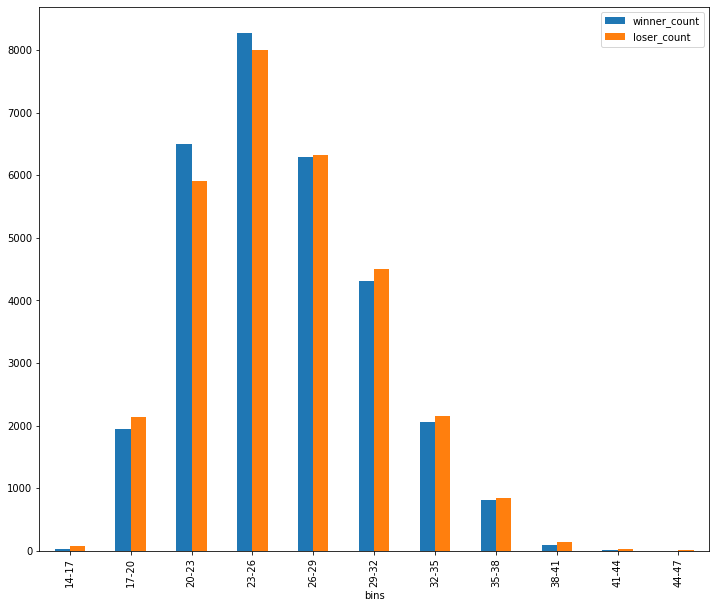

In [105]:
winners = all_data.groupby('winner_bins').agg({'match_num':'count'}).rename(columns={'match_num': 'winner_count'})
losers = all_data.groupby('loser_bins').agg({'match_num':'count'}).rename(columns={'match_num': 'loser_count'})

winners.index.names = ['bins']
losers.index.names = ['bins']

result = winners.join(losers, how='inner') 
plt.figure(figsize=(12, 10))
result.plot.bar(ax=plt.gca())
plt.show()

#this graph might means that 20-26 is peak age 

In [110]:
all_data['winner_ht'].min(), all_data['winner_ht'].max()

(163.0, 211.0)

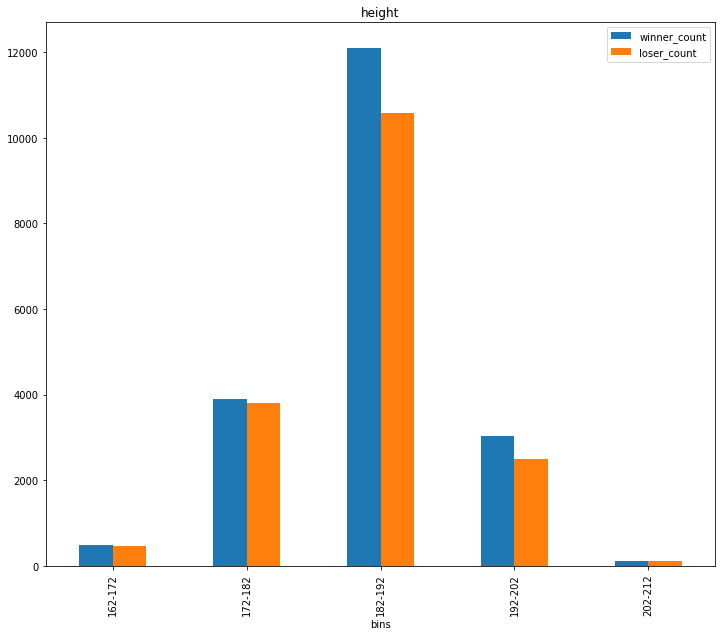

In [116]:
bins = np.arange(162,213,10)

labels = ['{}-{}'.format(bins[i], bins[i+1]) for i in np.arange(len(bins)-1)]

all_data['winner_bins'] = pd.cut(all_data['winner_ht'], bins=bins, labels=labels, right=True)
all_data['loser_bins'] = pd.cut(all_data['loser_ht'], bins=bins, labels=labels, right=True)

winners = all_data.groupby('winner_bins').agg({'match_num':'count'}).rename(columns={'match_num': 'winner_count'})
losers = all_data.groupby('loser_bins').agg({'match_num':'count'}).rename(columns={'match_num': 'loser_count'})

winners.index.names = ['bins']
losers.index.names = ['bins']

result = winners.join(losers, how='inner') 
plt.figure(figsize=(12, 10))
result.plot.bar(ax=plt.gca())
plt.title('height')
plt.show()


In [67]:
all_data[['winner_bins', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_ace', 'w_df']].groupby('winner_bins').agg('median')
#between 17 and 38 ages everything is pretty stable

,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_ace,w_df
winner_bins,,,,,,
14-17,75.0,45.5,32.5,15.0,3.0,2.0
17-20,67.0,42.0,31.0,14.0,4.0,2.0
20-23,67.0,41.0,30.0,14.0,4.0,2.0
23-26,67.0,42.0,31.0,14.0,4.0,2.0
26-29,67.0,42.0,31.0,14.0,5.0,2.0
29-32,67.0,42.0,31.0,14.0,4.0,2.0
32-35,68.0,42.0,31.0,14.0,4.0,2.0
35-38,67.0,42.0,32.0,14.0,4.0,2.0
38-41,69.0,42.0,31.0,15.0,4.0,3.0
